
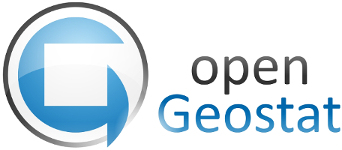

In [1]:
import pygslib
import numpy as np

In [2]:
# read gslib grid file (2d)
true =  pygslib.gslib.read_gslib_file('../datasets/true_log.dat') 
true_varmap =  pygslib.gslib.read_gslib_file('../datasets/variogram_map/varmap.out') 
clus_varmap =  pygslib.gslib.read_gslib_file('../datasets/variogram_map/varmap_clust.out') 

In [3]:
true_varmap.head(5)

variogram  number of pairs  head mean  tail mean  head variance  \
0    1.33001            400.0   0.472470  -0.155789   6.894388e-43   
1    1.33718            420.0   0.483574  -0.171450   8.043453e-43   
2    1.34414            440.0   0.488603  -0.187526   0.000000e+00   
3    1.40263            460.0   0.487333  -0.206366   0.000000e+00   
4    1.43992            480.0   0.483913  -0.211159   0.000000e+00   

   tail variance  
0   6.894388e-43  
1   8.043453e-43  
2   0.000000e+00  
3   0.000000e+00  
4   0.000000e+00

In [4]:
# add coordinates to true

par_true= {  'nx'  : 50,
        'ny'  : 50,
        'nz'  : 1,
        'xmn' : 0.5,
        'ymn' : 0.5,
        'zmn' : 1,
        'xsiz': 1,
        'ysiz': 1,
        'zsiz': 10,
        'grid': true }

true_xy = pygslib.gslib.addcoord(**par_true)

In [5]:
true_xy.head()

x    y    z   Primary  Secondary
0  0.5  0.5  1.0  0.354108   0.513218
1  1.5  0.5  1.0  0.515874   0.421604
2  2.5  0.5  1.0  0.447158   0.332438
3  3.5  0.5  1.0 -0.022276   0.227887
4  4.5  0.5  1.0 -0.920819  -0.292430

In [6]:
#make undefine nan
clus_varmap['variogram'][clus_varmap['variogram']==-999] = np.NaN
true_varmap['variogram'][true_varmap['variogram']==-999] = np.NaN
true['Primary'][true['Primary']==-999] = np.NaN

In [7]:
# add coordinates to true_varmap

par_varmap= {  'nx'  : 61,
        'ny'  : 61,
        'nz'  : 1,
        'xmn' : -30,
        'ymn' : -30,
        'zmn' : 0,
        'xsiz': 1,
        'ysiz': 1,
        'zsiz': 1,
        'grid': true_varmap }

true_varmap_xy = pygslib.gslib.addcoord(**par_varmap)

In [8]:
# add coordinates to clus_varmap

par_clus_varmap= {  'nx'  : 21,
        'ny'  : 21,
        'nz'  : 1,
        'xmn' : -30,
        'ymn' : -30,
        'zmn' : 0,
        'xsiz': 3,
        'ysiz': 3,
        'zsiz': 1,
        'grid': clus_varmap }

true_varmap_clus_xy = pygslib.gslib.addcoord(**par_clus_varmap)

In [9]:
#create traingulation
polydata = pygslib.vtktools.delaunay2D(true_xy.x.values, true_xy.y.values,true_xy.Primary.values)
polydata_vmmap_true = pygslib.vtktools.delaunay2D(true_varmap_xy.x.values, true_varmap_xy.y.values,true_varmap_xy.variogram.values)
polydata_vmmap_clus = pygslib.vtktools.delaunay2D(true_varmap_clus_xy.x.values, true_varmap_clus_xy.y.values,true_varmap_clus_xy.variogram.values)

In [10]:
pygslib.vtktools.SavePolydata(polydata, 'true')
pygslib.vtktools.SavePolydata(polydata_vmmap_true, 'varmap_true')
pygslib.vtktools.SavePolydata(polydata_vmmap_clus, 'vmmap_clus')